In [1]:
# Import standard libraries
import sys
import os
import importlib.util

# Add project path to module search path
app_path = os.path.abspath('../app')       # Get absolute path to the 'app' directory
sys.path.insert(0, app_path)               # Add this path to sys.path so it can be imported

# Dynamically load and execute mainapp.py
spec = importlib.util.spec_from_file_location("mainapp", os.path.join(app_path, "mainapp.py"))  # Create load specification
mainapp = importlib.util.module_from_spec(spec)  # Create an empty module object
spec.loader.exec_module(mainapp)                 # Execute the module and make it available


In [2]:
# Import required libraries
import matplotlib.pyplot as plt    # For creating visualizations and plots
import seaborn as sns              # For statistical visualizations built on top of matplotlib
import pandas as pd                # For working with structured tabular data

In [3]:
# Adjust pandas display options:
pd.set_option("display.width", 120)       # Set the maximum width of the display (for better table readability)
pd.set_option("display.max_columns", 10)  # Limit the number of visible columns to avoid horizontal scrolling

# Fetch raw data via API – for example from Zurich (ZRH) to Barcelona (BCN)
raw_data = mainapp.fetch_flight_data("ZRH", "BCN")  # First, fetch API data (JSON format)

# Convert raw data into a structured pandas DataFrame (incl. date, price, transfers, etc.)
df = mainapp.prepare_dataframe(raw_data)            # Then convert it into a DataFrame

# Display the first few rows of the prepared DataFrame for verification
print("First 5 rows of the data:")
print(df.head())                                    # Call df.head() only after df is defined


First 5 rows of the data:
  Reisedatum  Preis (CHF)  Anzahl Transfers  Flugdauer (Minuten) Wochentag der Suche
0 2025-05-30          105                 0                  225           Wednesday
1 2025-05-13          107                 1                 1325             Tuesday
2 2025-09-10          108                 0                  225              Sunday
3 2025-05-15          112                 0                  225              Friday
4 2025-06-11          129                 1                 1450              Monday


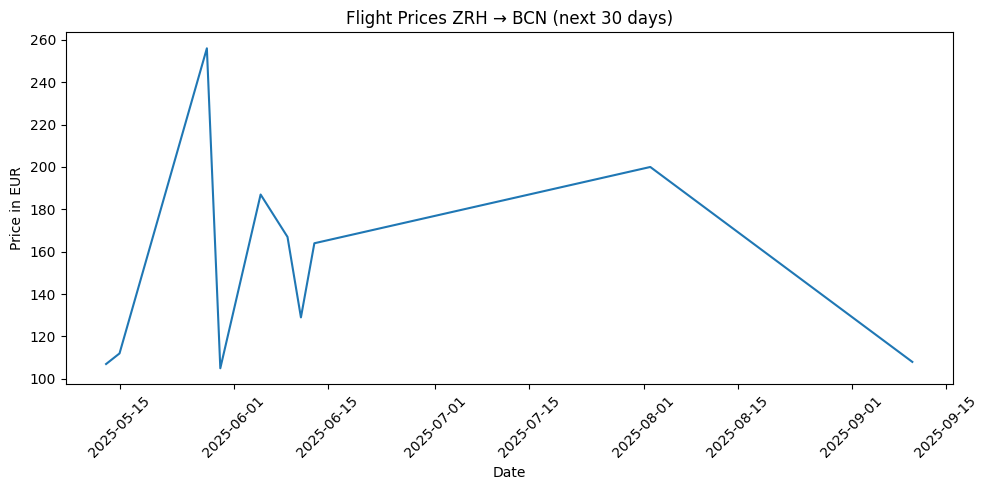

In [4]:
# Create a line chart to show flight prices over the next 30 days

plt.figure(figsize=(10, 5))  # Set the figure size to 10 x 5 inches for better readability

# Generate a line plot with travel date on the X-axis and price on the Y-axis
sns.lineplot(x="Reisedatum", y="Preis (CHF)", data=df)

# Set the title of the chart
plt.title("Flight Prices ZRH → BCN (next 30 days)")

# Add axis labels
plt.xlabel("Date")             # X-axis shows the travel date
plt.ylabel("Price in EUR")     # Y-axis shows the flight price (Note: adjust to CHF if needed)

# Rotate the date labels on the X-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45)

# Automatically adjust layout to prevent cutoff
plt.tight_layout()

# Show the chart
plt.show()


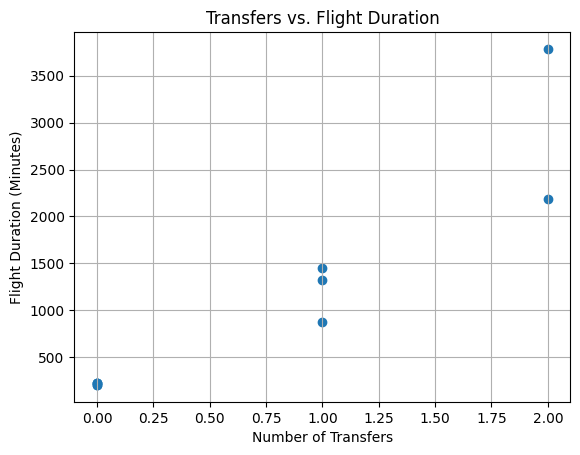

In [5]:
# Create a scatter plot to visualize the relationship between number of transfers and flight duration

# X-axis: Number of transfers, Y-axis: Flight duration in minutes
plt.scatter(df["Anzahl Transfers"], df["Flugdauer (Minuten)"])

# Set axis labels
plt.xlabel("Number of Transfers")             # Label for X-axis (e.g. 0 = direct flight, 1 = one stopover)
plt.ylabel("Flight Duration (Minutes)")       # Label for Y-axis (total travel time)

# Set the title of the chart
plt.title("Transfers vs. Flight Duration")    # Title explains the relationship being visualized

# Enable grid for better readability of data points
plt.grid(True)

# Display the chart
plt.show()


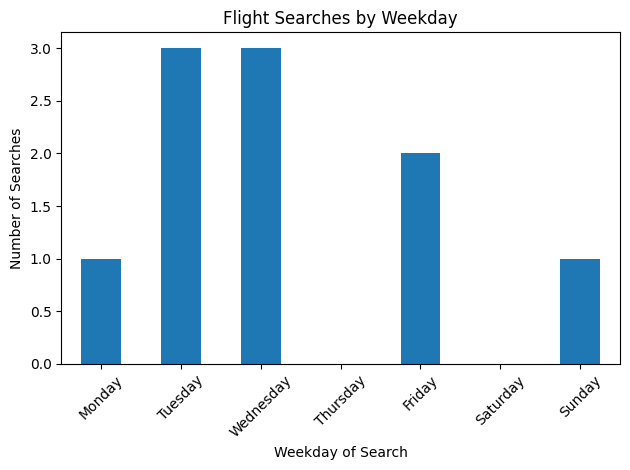

In [6]:
# Analyze and visualize the frequency of flight searches per weekday

# Define the desired order of weekdays for consistent sorting in the chart
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count how often each weekday appears in the 'Wochentag der Suche' column
day_counts = df["Wochentag der Suche"].value_counts()

# Reorder the counts according to the predefined weekday order
day_counts = day_counts.reindex(weekday_order)

# Create a bar chart showing the number of searches per weekday
day_counts.plot(kind="bar")
plt.title("Flight Searches by Weekday")        # Chart title
plt.xlabel("Weekday of Search")                # X-axis label
plt.ylabel("Number of Searches")               # Y-axis label
plt.xticks(rotation=45)                        # Rotate x-axis labels for better readability
plt.tight_layout()                             # Adjust layout to prevent clipping
plt.show()                                     # Display the chart


In [7]:
# Calculate average prices per weekday
weekday_avg = mainapp.compare_weekday_prices(df)

# Convert to DataFrame for cleaner output
weekday_df = weekday_avg.reset_index()
weekday_df.columns = ["Wochentag", "Durchschnittlicher Preis (CHF)"]

# Define desired order of weekdays
wochentag_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set weekday as a categorical variable with the defined order
weekday_df["Wochentag"] = pd.Categorical(weekday_df["Wochentag"], categories=wochentag_order, ordered=True)

# Sort DataFrame by the correct weekday order
weekday_df = weekday_df.sort_values("Wochentag")

# Output to console
print("\nAverage Prices per Weekday:")
print(weekday_df)



Average Prices per Weekday:
   Wochentag  Durchschnittlicher Preis (CHF)
1     Monday                      167.000000
4    Tuesday                      107.000000
5  Wednesday                      164.333333
3   Thursday                      149.500000
0     Friday                      134.500000
2   Saturday                      200.000000


In [8]:
# Perform a t-test using the data in the DataFrame df
t, p = mainapp.run_statistical_test(df)

# Print the test results: t-value indicates mean difference, p-value shows significance
print(f"\nt-Test Result:")
print(f"t-Wert: {t:.2f}")  # Output the t-value with two decimal places
print(f"p-Wert: {p:.4f}")  # Output the p-value with four decimal places

# Check if the p-value is below 0.05 → statistically significant
if p < 0.05:
    print("Statistically significant difference between Thursday and Saturday")
else:
    print("No significant price difference found")


t-Test Result:
t-Wert: nan
p-Wert: nan
No significant price difference found
